In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Se carga el dataset que ya ha sido limpiado previamente en R

In [3]:
cars = pd.read_csv('../datasets/vehicles_clean.csv')
cars

,Unnamed: 0,X,region,price,year,manufacturer,model,condition,cylinders,fuel,...,title_status,transmission,drive,size,type,paint_color,state,lat,long,category
0,4,3,auburn,2000.0,1974,chevrolet,c-10,good,4 cylinders,gas,...,clean,automatic,rwd,full-size,pickup,blue,al,32.861600,-85.216100,D
1,5,4,auburn,19500.0,2005,ford,f350 lariat,excellent,8 cylinders,diesel,...,lien,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.468200,A
2,15,14,auburn,4900.0,2003,ford,expedition,good,8 cylinders,gas,...,clean,automatic,rwd,full-size,SUV,blue,al,33.151200,-85.372200,D
3,20,19,auburn,47000.0,2020,jeep,gladiator,like new,6 cylinders,gas,...,clean,automatic,4wd,full-size,pickup,grey,al,32.611442,-85.481615,A
4,48,47,auburn,6250.0,2010,ford,fusion sel,good,6 cylinders,gas,...,clean,automatic,fwd,full-size,sedan,silver,al,32.547500,-85.468200,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83007,458205,458204,wausau,4495.0,2006,buick,lacrosse cx,good,6 cylinders,gas,...,clean,automatic,fwd,mid-size,sedan,black,wi,44.631225,-90.022076,D
83008,458209,458208,wausau,14995.0,2014,cadillac,srx,excellent,6 cylinders,gas,...,clean,automatic,4wd,mid-size,SUV,silver,wi,44.408867,-89.881210,B
83009,458210,458209,wausau,17895.0,2018,hyundai,tucson,excellent,4 cylinders,gas,...,clean,automatic,4wd,mid-size,SUV,white,wi,44.408867,-89.882240,A
83010,458211,458210,wyoming,17900.0,2014,cadillac,cts coupe awd,excellent,6 cylinders,gas,...,clean,automatic,4wd,mid-size,coupe,black,wy,44.784900,-106.964800,A


Convertimos las variables categóricas en dummies y dividimos en train y test. Tenemos dos variables de salida: price para regresión y category para clasificación.

In [5]:
feature_cols = ['year',
               'manufacturer',
               'condition',
               'cylinders',
               'fuel',
               'odometer',
               'title_status',
               'transmission',
               'drive',
               'size',
               'type',
               'paint_color',
               'state',
               'region',
               'model',
               'lat',
               'long']

X = cars[feature_cols]
X = pd.get_dummies(data=X, columns = ['manufacturer',
                                     'condition',
                                     'cylinders',
                                     'fuel',
                                     'title_status',
                                     'transmission',
                                     'drive',
                                     'size',
                                     'type',
                                     'paint_color',
                                     'state',
                                     'region',
                                     'model'])

y = cars[['price','category']]

train_x, test_x, train_y, test_y = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 123)

Modelo de árbol de decisión para regresión.

In [6]:
dtr = tree.DecisionTreeRegressor()
dtr_model = dtr.fit(train_x, train_y['price'])
train_score = dtr.score(train_x, train_y['price'])
test_score = dtr.score(test_x, test_y['price'])
print('Train Score: ', train_score)
print('Test Score: ', test_score)

Train Score:  0.9998801927831847
Test Score:  0.6803299111753707


Gráfica comparando el valor esperado con la predicción. A pesar de que el score de test es bajo, en la gráfica apreciamos como realmente no clasifica mal el modelo, el problema está en que hay vehículos muy caros que actuan como ruido y hacen que el modelo falle.

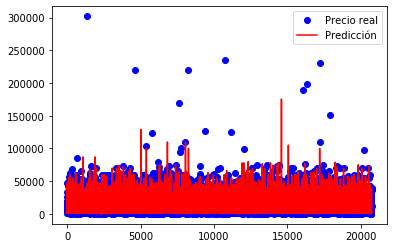

In [10]:
dtr_predict = dtr.predict(test_x)
plt.plot(np.array(test_y['price']), 'bo', label="Precio real")
plt.plot(dtr_predict, 'r', label="Predicción")
plt.legend()

Árbol de decisión para clasificación y matriz de confusión obtenida.

In [183]:
dtc = tree.DecisionTreeClassifier()
dtc_model = dtc.fit(train_x, train_y['category'])
train_score = dtc.score(train_x, train_y['category'])
test_score = dtc.score(test_x, test_y['category'])
print('Train Score: ', train_score)
print('Test Score: ', test_score)

dtc_predict = dtc.predict(test_x)
cm = confusion_matrix(test_y['category'], predict)

print(cm)

Train Score:  0.9987471690839879
Test Score:  0.7484219149038693
[[4169  497   70   47]
 [ 543 3840  762  187]
 [  92  798 3400  987]
 [  50  215  973 4123]]


In [16]:
cars.price.describe()

count     83012.000000
mean      12519.500614
std       11409.153766
min           2.000000
25%        4995.000000
50%        8995.000000
75%       16350.000000
max      345000.000000
Name: price, dtype: float64

Como hemos visto que los valores muy elevados perjudican al modelo, vamos a probar a eliminar este "ruido".

In [32]:
cars2 = cars[cars['price'] < 50000]

In [33]:
feature_cols = ['year',
               'manufacturer',
               'condition',
               'cylinders',
               'fuel',
               'odometer',
               'title_status',
               'transmission',
               'drive',
               'size',
               'type',
               'paint_color',
               'state',
               'region',
               'model',
               'lat',
               'long']

X = cars2[feature_cols]
X = pd.get_dummies(data=X, columns = ['manufacturer',
                                     'condition',
                                     'cylinders',
                                     'fuel',
                                     'title_status',
                                     'transmission',
                                     'drive',
                                     'size',
                                     'type',
                                     'paint_color',
                                     'state',
                                     'region',
                                     'model'])

y = cars2[['price','category']]

train_x, test_x, train_y, test_y = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 123)

La puntuación de test mejora a 0.74

In [36]:
dtr = tree.DecisionTreeRegressor()
dtr_model = dtr.fit(train_x, train_y['price'])
train_score = dtr.score(train_x, train_y['price'])
test_score = dtr.score(test_x, test_y['price'])
print('Train Score: ', train_score)
print('Test Score: ', test_score)

Train Score:  0.9997943784684615
Test Score:  0.7450681010475454


La predicción se adapta mucho más al valor esperado.

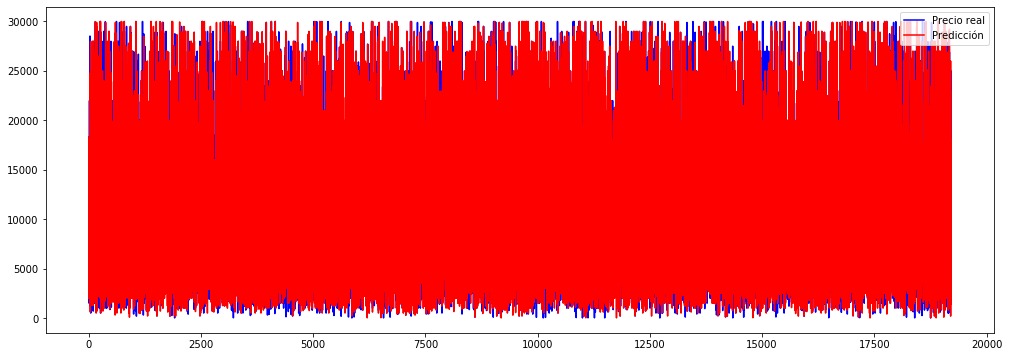

In [35]:
dtr_predict = dtr.predict(test_x)
plt.figure(figsize=(17, 6))
plt.plot(np.array(test_y['price']), 'b', label="Precio real")
plt.plot(dtr_predict, 'r', label="Predicción")
plt.legend()
